<a href="https://colab.research.google.com/github/yakuparas28/YapaySinirAglari/blob/main/YapaySinirA%C4%9Flar%C4%B127_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Veri işleme için
import pandas as pd
import numpy as np

# Model oluşturma ve değerlendirme için
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Input

# Görselleştirme için
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Gerekli kütüphaneler başarıyla yüklendi!")


Gerekli kütüphaneler başarıyla yüklendi!


In [ ]:
# PyTorch kütüphaneleri
import torch
from torchvision import datasets, transforms

# MNIST Veri Setini İndirelim
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Eğitim ve test veri setlerini  indirelim
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Veri setini DataLoader ile yükleyelim
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(f"MNIST veri seti başarıyla yüklendi!")
print(f"Eğitim veri seti boyutu: {len(train_data)}")
print(f"Test veri seti boyutu: {len(test_data)}")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 37.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.26MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.6MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.10MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

MNIST veri seti başarıyla yüklendi!
Eğitim veri seti boyutu: 60000
Test veri seti boyutu: 10000


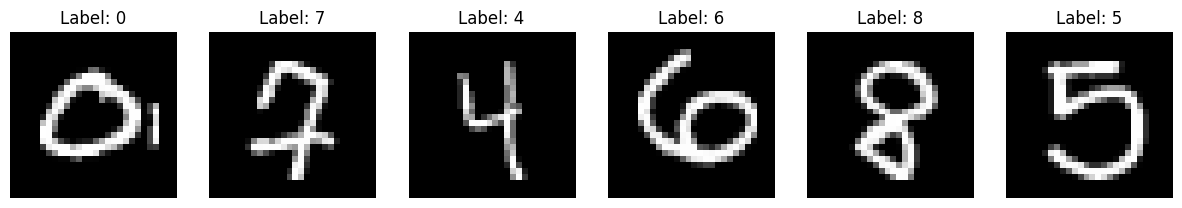

In [ ]:
# Örnek görselleştirme

import matplotlib.pyplot as plt

examples = iter(train_loader)
# Use next(examples) instead of examples.next()
images, labels = next(examples)

fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for i in range(6):
    axes[i].imshow(images[i].numpy().squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis('off')
plt.show()

In [ ]:
# PyTorch veri setini numpy formatına dönüştürme
X_train = train_data.data.numpy().reshape(-1, 28*28)  # 28x28 boyutunda resimleri düzleştiriyoruz
y_train = train_data.targets.numpy()

X_test = test_data.data.numpy().reshape(-1, 28*28)
y_test = test_data.targets.numpy()

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (60000, 784), y_train shape: (60000,)
X_test shape: (10000, 784), y_test shape: (10000,)


In [ ]:
# Eksik değer kontrolü
import numpy as np
print(f"X_train eksik değer var mı? {np.isnan(X_train).any()}")
print(f"X_test eksik değer var mı? {np.isnan(X_test).any()}")


X_train eksik değer var mı? False
X_test eksik değer var mı? False


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Yeni Eğitim seti: {X_train.shape}, Doğrulama seti: {X_val.shape}")


Yeni Eğitim seti: (48000, 784), Doğrulama seti: (12000, 784)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("Özellikler standartlaştırıldı.")


Özellikler standartlaştırıldı.


Eğitim (%80) ve test (%20) olarak ayrıldı.
Özellikler standartlaştırıldı.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Temel bir MLP Modeli tanımlama yapalım
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64,),  # 64 nöronlu bir gizli katman
    activation='relu',         # Aktivasyon fonksiyonu
    solver='adam',             # Optimizasyon algoritması
    max_iter=50,               # Maksimum iterasyon sayısı
    random_state=42            # Rastgelelik için sabit değer
)

# Modeli eğitelim
mlp_model.fit(X_train, y_train)

# Doğrulama seti üzerinde tahmin yapalım
y_val_pred = mlp_model.predict(X_val)

# Model Performansı
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Validation Accuracy: 0.96875

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1175
           1       0.98      0.99      0.98      1322
           2       0.95      0.96      0.96      1174
           3       0.97      0.96      0.96      1219
           4       0.97      0.98      0.98      1176
           5       0.97      0.96      0.96      1104
           6       0.97      0.98      0.98      1177
           7       0.97      0.97      0.97      1299
           8       0.97      0.95      0.96      1160
           9       0.96      0.97      0.97      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [ ]:
from sklearn.model_selection import GridSearchCV

# Hiperparametreler için arama aralığı
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(
    MLPClassifier(max_iter=50, random_state=42),
    param_grid,
    cv=3,  # 3 katmanlı çapraz doğrulama
    scoring='accuracy',
    verbose=1
)

# Grid Search ile eğitme
grid_search.fit(X_train, y_train)

# En iyi sonuçlar
print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi doğrulama puanı: {grid_search.best_score_}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
En iyi parametreler: {'activation': 'relu', 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001, 'solver': 'adam'}
En iyi doğrulama puanı: 0.9683333333333334


In [ ]:
# En iyi modeli test setinde değerlendirme
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.9772

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
import pandas as pd

# GridSearchCV sonuçlarını bir DataFrame'e çevirme
results_df = pd.DataFrame(grid_search.cv_results_)

# İlgili kolonları seçme
results_df = results_df[
    [
        "param_hidden_layer_sizes",
        "param_activation",
        "param_solver",
        "param_learning_rate_init",
        "mean_test_score",
        "std_test_score"
    ]
]

# Performans metriklerini sıraya koyma
results_df = results_df.sort_values(by="mean_test_score", ascending=False)

# Görüntüleme
# The ace_tools module is not a standard Python library and likely an OpenAI internal library.
# Instead, we can use the display() function or print() to view the DataFrame.
display(results_df)  # If using IPython/Jupyter Notebook
# print(results_df)  # If using a standard Python environment


,param_hidden_layer_sizes,param_activation,param_solver,param_learning_rate_init,mean_test_score,std_test_score
18,"(128, 64)",relu,adam,0.001,0.968333,0.000546
6,"(128,)",relu,adam,0.001,0.967604,0.000503
0,"(64,)",relu,adam,0.001,0.963375,0.000589
21,"(128, 64)",relu,sgd,0.010,0.963354,0.000564
9,"(128,)",relu,sgd,0.010,0.963187,0.000552
11,"(128,)",relu,sgd,0.100,0.962542,0.002667
12,"(64, 32)",relu,adam,0.001,0.960479,0.001466
3,"(64,)",relu,sgd,0.010,0.960417,0.000638
10,"(128,)",relu,adam,0.100,0.959896,0.000708
8,"(128,)",relu,adam,0.010,0.959708,0.001794


from matplotlib import pyplot as plt
results_df['param_learning_rate_init'].plot(kind='hist', bins=20, title='param_learning_rate_init')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['mean_test_score'].plot(kind='hist', bins=20, title='mean_test_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['std_test_score'].plot(kind='hist', bins=20, title='std_test_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('param_hidden_layer_sizes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('param_activation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('param_solver').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='param_learning_rate_init', y='mean_test_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='mean_test_score', y='std_test_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['param_learning_rate_init'].plot(kind='line', figsize=(8, 4), title='param_learning_rate_init')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['mean_test_score'].plot(kind='line', figsize=(8, 4), title='mean_test_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['std_test_score'].plot(kind='line', figsize=(8, 4), title='std_test_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['param_activation'].value_counts()
    for x_label, grp in results_df.groupby('param_hidden_layer_sizes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('param_hidden_layer_sizes')
_ = plt.ylabel('param_activation')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['param_solver'].value_counts()
    for x_label, grp in results_df.groupby('param_activation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('param_activation')
_ = plt.ylabel('param_solver')

ValueError: Names should be list-like for a MultiIndex

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['param_hidden_layer_sizes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='param_learning_rate_init', y='param_hidden_layer_sizes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['param_activation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='param_learning_rate_init', y='param_activation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['param_solver'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='param_learning_rate_init', y='param_solver', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

ValueError: Names should be list-like for a MultiIndex

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['param_hidden_layer_sizes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='mean_test_score', y='param_hidden_layer_sizes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

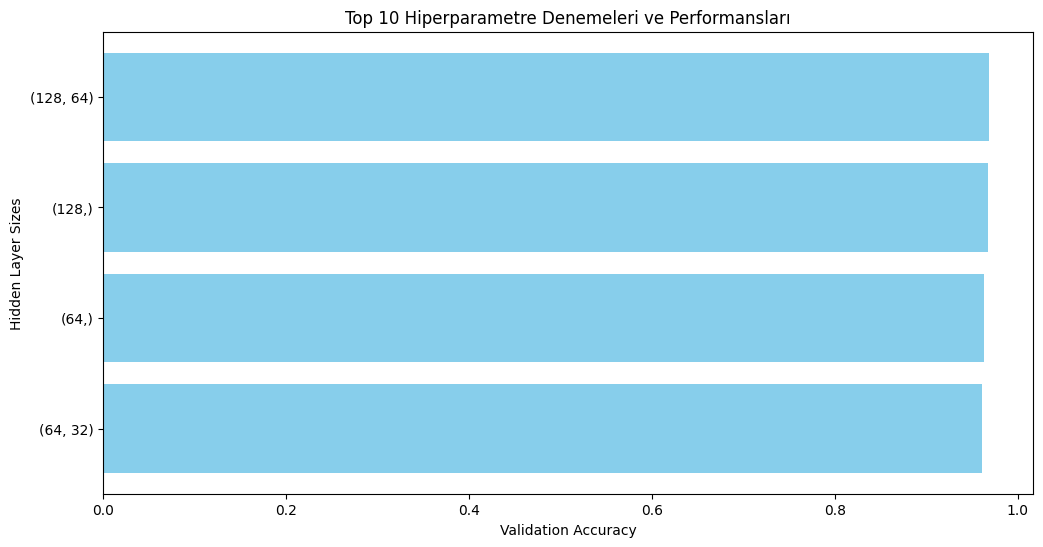

In [ ]:
import matplotlib.pyplot as plt
# En iyi öğrenme oranlarını filtreleme
top_params = results_df.head(10)
# Görselleştirme
plt.figure(figsize=(12, 6))
plt.barh(top_params["param_hidden_layer_sizes"].astype(str), top_params["mean_test_score"], color="skyblue")
plt.xlabel("Validation Accuracy")
plt.ylabel("Hidden Layer Sizes")
plt.title("Top 10 Hiperparametre Denemeleri ve Performansları")
plt.gca().invert_yaxis()  # En iyi sonuç üste gelsin
plt.show()


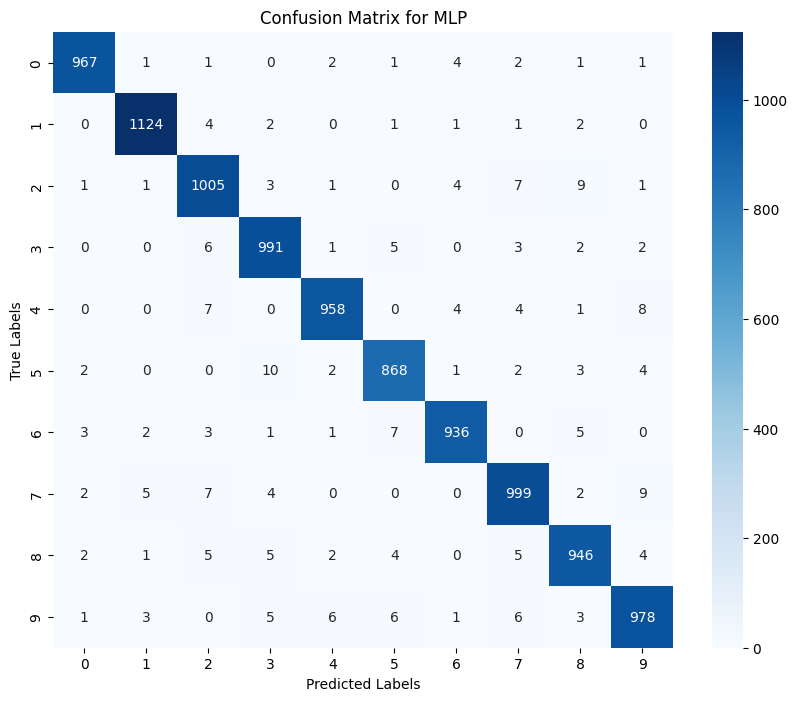

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Test seti üzerinde tahmin yapma
y_test_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Confusion Matrix'i Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.title("Confusion Matrix for MLP")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf

# Define RBF activation function
def rbf(x):
    return tf.exp(-tf.pow(x, 2))

# RBF Modeli
rbf_model = Sequential()
rbf_model.add(Input(shape=(X_train.shape[1],)))  # Giriş katmanı
rbf_model.add(Dense(64, activation=rbf))      # RBF aktivasyon fonksiyonu
rbf_model.add(Dense(10, activation='softmax'))  # Çıkış katmanı (10 sınıf)

# Modeli Derleme
rbf_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli Eğitme
history = rbf_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, verbose=1)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7387 - loss: 1.0575 - val_accuracy: 0.9227 - val_loss: 0.3330
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9371 - loss: 0.2769 - val_accuracy: 0.9369 - val_loss: 0.2459
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9543 - loss: 0.1862 - val_accuracy: 0.9362 - val_loss: 0.2260
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9623 - loss: 0.1517 - val_accuracy: 0.9395 - val_loss: 0.2105
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9669 - loss: 0.1278 - val_accuracy: 0.9399 - val_loss: 0.2018
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9712 - loss: 0.1111 - val_accuracy: 0.9381 - val_loss: 0.2124
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9710 - loss: 0.1062 - val_accuracy: 0.9369 - val_loss: 0.2141
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9739 - loss: 0.0970 - val_accuracy: 0.

In [ ]:
# Test Setinde Tahmin
y_test_pred = rbf_model.predict(X_test).argmax(axis=1)
# Performans Raporu
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_test_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy: 0.9283

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.97      0.99      0.98      1135
           2       0.92      0.91      0.91      1032
           3       0.92      0.92      0.92      1010
           4       0.92      0.93      0.93       982
           5       0.90      0.89      0.89       892
           6       0.93      0.94      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.93      0.90      0.91       974
           9       0.92      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



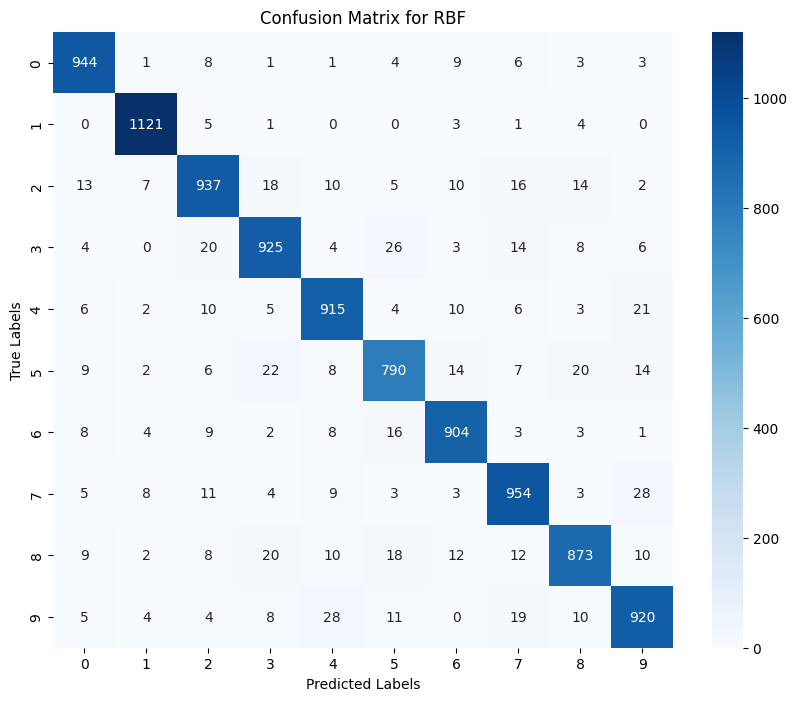

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.title("Confusion Matrix for RBF")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
# Yeni bir model tanımlama
def create_rbf_model(hidden_units=64, optimizer='adam'):
    # Define RBF activation function
    def rbf(x):
        return tf.exp(-tf.pow(x, 2))

    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    # Pass the custom rbf function as the activation argument
    model.add(Dense(hidden_units, activation=rbf))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Farklı parametre denemeleri
hidden_units_list = [32, 64, 128]
optimizers = ['adam', 'sgd']

for units in hidden_units_list:
    for opt in optimizers:
        print(f"Training with hidden_units={units} and optimizer={opt}")
        rbf_model = create_rbf_model(hidden_units=units, optimizer=opt)
        rbf_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, verbose=1)


Training with hidden_units=32 and optimizer=adam
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6615 - loss: 1.3856 - val_accuracy: 0.8917 - val_loss: 0.5185
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9039 - loss: 0.4353 - val_accuracy: 0.9114 - val_loss: 0.3636
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9278 - loss: 0.3029 - val_accuracy: 0.9199 - val_loss: 0.3081
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9395 - loss: 0.2406 - val_accuracy: 0.9221 - val_loss: 0.2874
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9408 - loss: 0.2194 - val_accuracy: 0.9215 - val_loss: 0.2727
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9497 - loss: 0.1886 - val_accuracy: 0.9221 - val_loss: 0.2690
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9499 - loss: 0.1821 - val_accuracy: 0.9225 - val_loss: 0.2631
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a

In [ ]:
import pandas as pd

# Hiperparametre sonuçlarını saklamak için bir liste
results = []

# Farklı parametre kombinasyonları için eğitim
for units in hidden_units_list:
    for opt in optimizers:
        print(f"Training with hidden_units={units} and optimizer={opt}")
        rbf_model = create_rbf_model(hidden_units=units, optimizer=opt)
        history = rbf_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, verbose=0)

        # Doğrulama doğruluğunu kaydet
        val_acc = max(history.history['val_accuracy'])  # En iyi doğrulama doğruluğu
        results.append({'hidden_units': units, 'optimizer': opt, 'val_accuracy': val_acc})

# Sonuçları DataFrame'e çevir
results_df = pd.DataFrame(results)

# Performansa göre sıralama
results_df = results_df.sort_values(by='val_accuracy', ascending=False)

# Tabloyu görüntüleme
# Instead of using the custom module 'ace_tools', use the display function from IPython.display
from IPython.display import display
display(results_df)
# This will display the results_df in the Jupyter Notebook output.
# If you are not in a Jupyter Notebook, you can print the dataframe:
# print(results_df)


Training with hidden_units=32 and optimizer=adam
Training with hidden_units=32 and optimizer=sgd
Training with hidden_units=64 and optimizer=adam
Training with hidden_units=64 and optimizer=sgd
Training with hidden_units=128 and optimizer=adam
Training with hidden_units=128 and optimizer=sgd


,hidden_units,optimizer,val_accuracy
4,128,adam,0.951417
5,128,sgd,0.944333
2,64,adam,0.942167
3,64,sgd,0.932417
0,32,adam,0.924417
1,32,sgd,0.917750


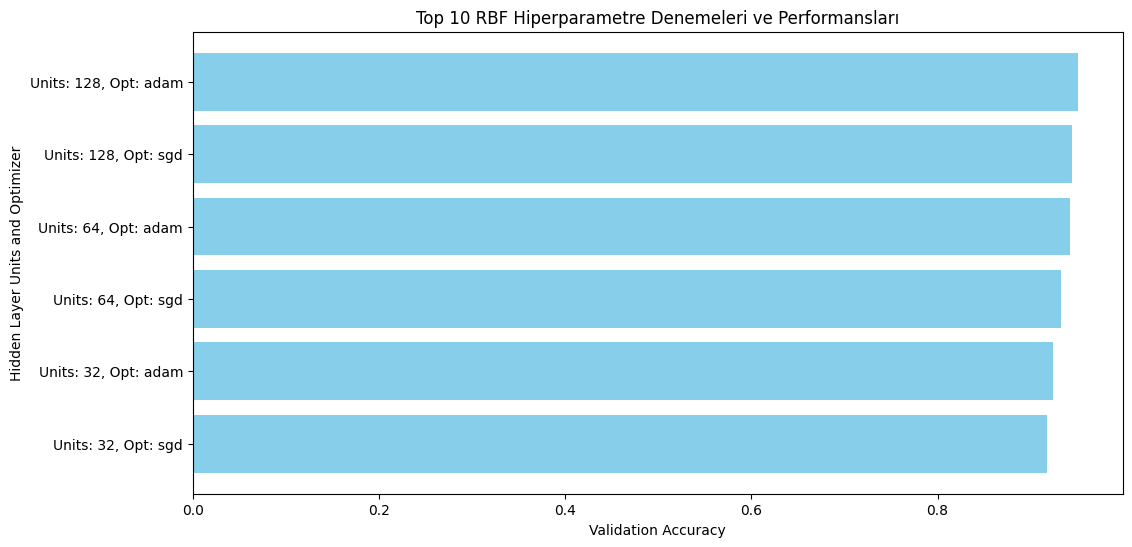

In [ ]:
import matplotlib.pyplot as plt
# En iyi 10 sonucu filtreleme
top_results = results_df.head(10)
# Çubuk grafik
plt.figure(figsize=(12, 6))
plt.barh(
    top_results.apply(lambda x: f"Units: {x['hidden_units']}, Opt: {x['optimizer']}", axis=1),
    top_results['val_accuracy'],
    color="skyblue"
)
plt.xlabel("Validation Accuracy")
plt.ylabel("Hidden Layer Units and Optimizer")
plt.title("Top 10 RBF Hiperparametre Denemeleri ve Performansları")
plt.gca().invert_yaxis()  # En iyi sonuç üste gelsin
plt.show()
